In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_train = pd.read_csv('train.csv')
# df_test = pd.read_csv('test.csv') # validation
# df_sample = pd.read_csv('sample_submission.csv')

In [71]:
df_train.shape

(1460, 106)

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [42]:
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [39]:
df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean(), inplace=True)

In [41]:
df_train.fillna(df_train.mean(), inplace=True)

/var/folders/l0/bd0gq4951kg8_crxd8xm3t400000gp/T/ipykernel_6633/1739587153.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train.fillna(df_train.mean(), inplace=True)


In [80]:
X = df_train[['GrLivArea', 'LotArea']].values #.reshape(-1,1)
y = df_train.SalePrice.values.reshape(-1,1)

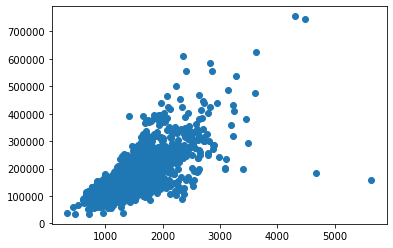

In [6]:
plt.scatter(X, y)

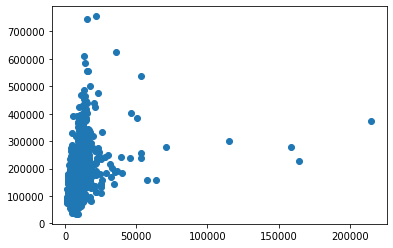

In [20]:
plt.scatter(df_train.LotArea, y)

<AxesSubplot:xlabel='LotArea'>

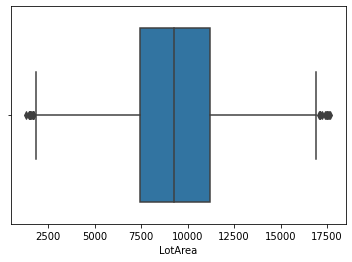

In [37]:
sns.boxplot(x='LotArea', data=df_train)

In [26]:
# Tukey's method (IQR)
Q1 = df_train.LotArea.quantile(0.25)
Q3 = df_train.LotArea.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df_train.LotArea =  df_train.LotArea[df_train.LotArea < (Q3+IQR*1.5)] # Remove upper outliers

4048.0


In [45]:
# Categorical encoding orthodonal values (example)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['LandSlope'] = le.fit_transform(df_train['LandSlope'])

In [58]:
df_train.Neighborhood.unique()

array([0, 1], dtype=uint8)

In [62]:
# Nominal categorical encoding (example)
df_train = pd.get_dummies(df_train, columns=['Street'])

In [59]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,1,60,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,1
2,3,60,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917.0,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
1456,1457,20,RL,85.0,13175.0,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
1457,1458,70,RL,66.0,9042.0,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
1458,1459,20,RL,68.0,9717.0,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0


In [93]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

In [103]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [104]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [105]:
print("Accu [train]: ", model.score(X_train, y_train))
#print("MSE: ", mse)

Accu [train]:  0.553206621965669


In [106]:
print("Accu [test]: ", model.score(X_test, y_test))
print("MSE: ", mse)

Accu [test]:  0.5271748608498086
MSE:  3265259470.18033
